In [70]:
import pandas as pd

In [71]:
user_data = pd.read_csv('user_data.csv', sep = ',')
logs = pd.read_csv ('logs.csv', sep = ',')

Проверьте размер таблицы, типы переменных, посмотрите на описательную статистику. 

In [72]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [73]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [74]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [75]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

Находим сколько платформ проедставлено

In [76]:
logs.platform.nunique()

3

Какой клиент совершил больше всего успешных операций?

In [77]:
success_count = logs.query('success == True') \
                    .groupby('client', as_index = False) \
                    .agg({'platform': 'count'}) \
                    .rename(columns = {'platform': 'success_count'}) \
                    .sort_values('success_count', ascending = False) \
    
    

Выбираем максимальное число успешных операций

In [78]:
maximum_success = success_count.success_count.max()

Выбираем из списка тех клиентов, чье число успешных операций равно максимальному и сортируем их

In [79]:
successful_clients = success_count.query('success_count == @maximum_success') \
                                    .sort_values('client') \
                                    .client\
                                    .tolist()

In [80]:
successful_clients

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

Переводим список в строку

In [81]:
for client in successful_clients:
    print(client, end =', ')

12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584, 

In [82]:
', '.join([str(client) for client in successful_clients])

'12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584'

Второй вариант без query, так как значения true = 1 false = 0 и можо просто посчиать их сумму

In [83]:
success_count_2 = logs \
                    .groupby('client', as_index = False) \
                    .agg({'success': 'sum'}) \
                    .rename(columns = {'success': 'success_count'}) \
                    .sort_values('success_count', ascending = False) 

In [84]:
maximum_success_2 = success_count_2.success_count.max()

In [85]:
successful_clients_2 = success_count.query('success_count == @maximum_success_2') \
                                    .sort_values('client') \
                                    .client\
                                    .tolist()

In [86]:
', '.join([str(client) for client in successful_clients_2])

'12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584'

In [87]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


Находим платформу с наибольшим количеством успешных клиентов

In [88]:
success_platform = logs \
                    .groupby('platform', as_index = False) \
                    .agg({'success': 'sum'}) \
                    .rename(columns = {'success': 'success_count'}) \
                    .sort_values('success_count', ascending = False) \
                    

In [89]:
maximum_success_2 = success_platform.success_count.max()

In [90]:
successful__platform = success_platform.query('success_count == @maximum_success_2') 
                                    

In [91]:
successful__platform

,platform,success_count
1,phone,2019


Какую платформу предпочитают премиальные клиенты?

In [92]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [93]:
user_data.merge(logs, on = 'client').groupby('platform').agg({'premium': 'sum'})

,premium
platform,
computer,150
phone,246
tablet,24


In [94]:
data = user_data.merge(logs)
data.query('premium == True').platform.value_counts()


phone       246
computer    150
tablet       24
Name: platform, dtype: int64

Визуализируем распределение возраста клиентов в зависимости от типа клиента (премиум или нет), используя библиотеку seaborn с исходными параметрами. Какой график получится в результате?

Используем датасет, который получили на предыдущем шаге.

In [95]:
import seaborn as sns

In [96]:
user_data_premium = data.query('premium == True')
user_data_usual = data.query('premium == False')

D:\Programm\ju\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Programm\ju\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


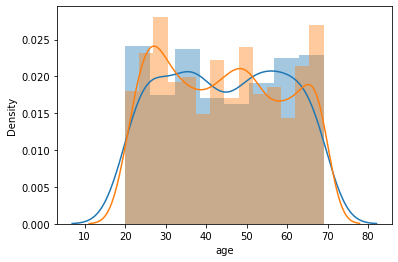

In [97]:
ax = sns.distplot(user_data_premium.age)
ax = sns.distplot(user_data_usual.age)


In [98]:
import matplotlib.pyplot as plt

D:\Programm\ju\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Programm\ju\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

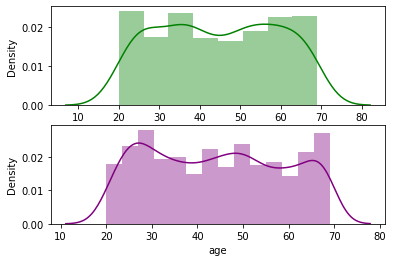

In [99]:
fig, ax = plt.subplots(nrows = 2, ncols = 1)
sns.distplot(user_data_premium.age, ax = ax[0], color = 'green')
sns.distplot(user_data_usual.age, ax = ax[1], color = 'purple')

Постройте график распределения числа успешных операций: 

x – число успешных операций
y – число клиентов, совершивших такое количество успешных операций

In [100]:
c1 = data.groupby('client').agg({'success': 'sum'})

In [101]:
c1

,success
client,
40,1
75,1
81,1
132,1
164,1
...,...
99926,1
99927,1
99931,1


D:\Programm\ju\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


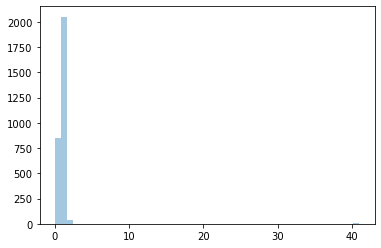

In [102]:
ax = sns.distplot(c1, kde = False)

In [105]:
c1.success.value_counts()

1     2051
0      850
2       42
41       9
40       1
3        1
Name: success, dtype: int64

Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. По оси x – возраст, по оси y – число успешных операций.  
Клиенты какого возраста совершили наибольшее количество успешных действий?

In [120]:
data.head()

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918


In [124]:
successful_age = data.query('platform == "computer"' and 'success == True')

D:\Programm\ju\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

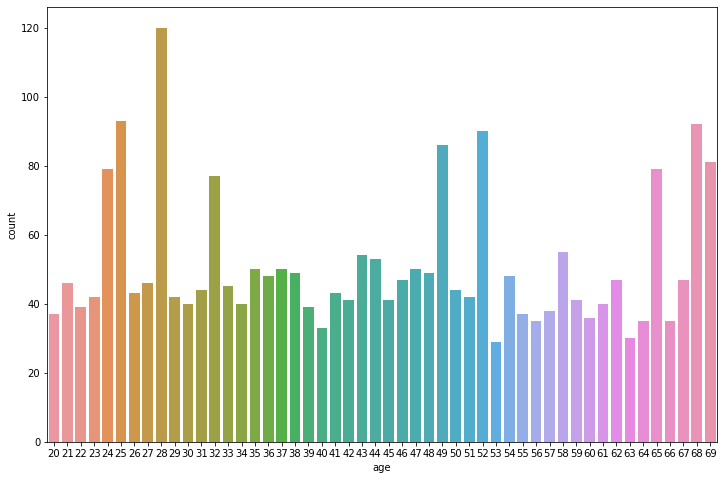

In [134]:
plt.figure(figsize=(12, 8)) 
sns.countplot(successful_age.age)


In [128]:
successful_age.groupby('age').agg({'success': 'sum'}).idxmax()

success    28
dtype: int64

In [135]:
successful_age_1 = data.query('platform == "computer"') \
                        .groupby('age', as_index = False) \
                        .agg({'success': 'sum'})

<AxesSubplot:xlabel='age', ylabel='success'>

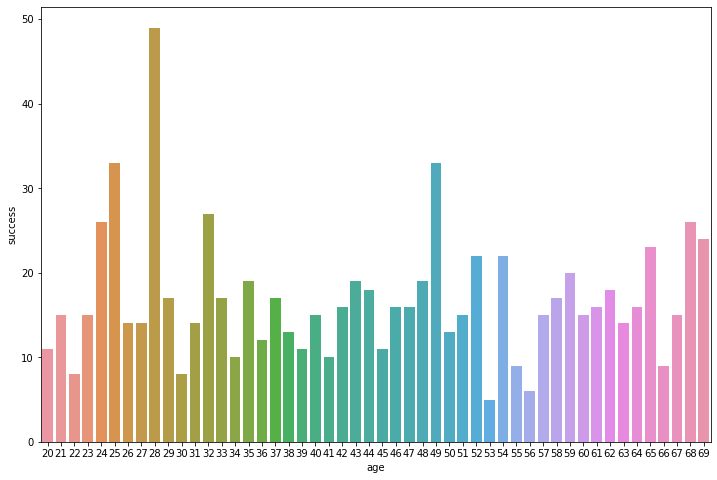

In [139]:
plt.figure(figsize=(12, 8)) 
sns.barplot(x='age', y = 'success', data=successful_age_1)
